<a href="https://colab.research.google.com/github/CMACOBRADOR/Audio-Signal-Processing/blob/master/LicensePlateNumberDetectio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
!unzip /content/gdrive/MyDrive/ECE160/mutens.zip -d /content/one

Archive:  /content/gdrive/MyDrive/ECE160/mutens.zip
   creating: /content/one/mutens/images/
  inflating: /content/one/mutens/images/1.jpg  
  inflating: /content/one/mutens/images/10.jpg  
  inflating: /content/one/mutens/images/100.jpg  
  inflating: /content/one/mutens/images/101.jpg  
  inflating: /content/one/mutens/images/102.jpg  
  inflating: /content/one/mutens/images/103.jpg  
  inflating: /content/one/mutens/images/104.jpg  
  inflating: /content/one/mutens/images/105.jpg  
  inflating: /content/one/mutens/images/106.jpg  
  inflating: /content/one/mutens/images/107.jpg  
  inflating: /content/one/mutens/images/108.jpg  
  inflating: /content/one/mutens/images/110.jpg  
  inflating: /content/one/mutens/images/112.jpg  
  inflating: /content/one/mutens/images/113.jpg  
  inflating: /content/one/mutens/images/114.jpg  
  inflating: /content/one/mutens/images/115.jpg  
  inflating: /content/one/mutens/images/116.jpg  
  inflating: /content/one/mutens/images/118.jpg  
  inflatin

In [1]:
!pip install torch==1.8.2+cu111 torchvision==0.9.2+cu111 torchaudio===0.8.2 -f https://download.pytorch.org/whl/lts/1.8/torch_lts.html

Looking in links: https://download.pytorch.org/whl/lts/1.8/torch_lts.html
     |█████████████▌                  | 834.1 MB 1.3 MB/s eta 0:14:43tcmalloc: large alloc 1147494400 bytes == 0x3a3d0000 @  0x7fd4a9cd0615 0x592b76 0x4df71e 0x59afff 0x515655 0x549576 0x593fce 0x548ae9 0x51566f 0x549576 0x593fce 0x548ae9 0x5127f1 0x598e3b 0x511f68 0x598e3b 0x511f68 0x598e3b 0x511f68 0x4bc98a 0x532e76 0x594b72 0x515600 0x549576 0x593fce 0x548ae9 0x5127f1 0x549576 0x593fce 0x5118f8 0x593dd7
     |█████████████████               | 1055.7 MB 1.3 MB/s eta 0:11:52tcmalloc: large alloc 1434370048 bytes == 0x7ea26000 @  0x7fd4a9cd0615 0x592b76 0x4df71e 0x59afff 0x515655 0x549576 0x593fce 0x548ae9 0x51566f 0x549576 0x593fce 0x548ae9 0x5127f1 0x598e3b 0x511f68 0x598e3b 0x511f68 0x598e3b 0x511f68 0x4bc98a 0x532e76 0x594b72 0x515600 0x549576 0x593fce 0x548ae9 0x5127f1 0x549576 0x593fce 0x5118f8 0x593dd7
     |█████████████████████▋          | 1336.2 MB 1.3 MB/s eta 0:08:36tcmalloc: large alloc 1792966656 by

In [4]:
!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 13286, done.
remote: Counting objects: 100% (98/98), done.
remote: Compressing objects: 100% (38/38), done.
remote: Total 13286 (delta 67), reused 82 (delta 60), pack-reused 13188
Receiving objects: 100% (13286/13286), 12.04 MiB | 32.70 MiB/s, done.
Resolving deltas: 100% (9237/9237), done.


In [5]:
!pip install -r /content/yolov5/requirements.txt

     |████████████████████████████████| 596 kB 31.6 MB/s 
  Attempting uninstall: PyYAML
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [6]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2

In [7]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

Downloading: "https://github.com/ultralytics/yolov5/archive/master.zip" to /root/.cache/torch/hub/master.zip
requirements: PyYAML>=5.3.1 not found and is required by YOLOv5, attempting auto-update...

requirements: torch>=1.7.0 not found and is required by YOLOv5, attempting auto-update...

requirements: torchvision>=0.8.1 not found and is required by YOLOv5, attempting auto-update...

requirements: 3 packages updated per /root/.cache/torch/hub/ultralytics_yolov5_master/requirements.txt
requirements: ⚠️ Restart runtime or rerun command for updates to take effect

YOLOv5 🚀 2022-5-7 torch 1.8.2+cu111 CUDA:0 (Tesla T4, 15110MiB)



  0%|          | 0.00/14.1M [00:00<?, ?B/s]


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.5 GFLOPs
Adding AutoShape... 


In [10]:
!cd yolov5 && python train.py --img 320 --batch 16 --epochs 100 --data dataset.yml --weights yolov5s.pt --workers 2

train: weights=yolov5s.pt, cfg=, data=dataset.yml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=100, batch_size=16, imgsz=320, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=2, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.1-177-gd059d1d torch 1.8.2+cu111 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, degrees=0.0, translate

In [11]:
model = torch.hub.load('ultralytics/yolov5','custom', path='/content/yolov5/runs/train/exp2/weights/best.pt', force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/archive/master.zip" to /root/.cache/torch/hub/master.zip
requirements: PyYAML>=5.3.1 not found and is required by YOLOv5, attempting auto-update...

requirements: 1 package updated per /root/.cache/torch/hub/ultralytics_yolov5_master/requirements.txt
requirements: ⚠️ Restart runtime or rerun command for updates to take effect

YOLOv5 🚀 2022-5-7 torch 1.8.2+cu111 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 213 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


In [ ]:
!pip install -r /content/yolov5/requirements.txt

In [21]:
!unzip /content/gdrive/MyDrive/ECE160/test.zip -d /content/two

Archive:  /content/gdrive/MyDrive/ECE160/test.zip
  inflating: /content/two/Plate number datasets/16.ipynb  
  inflating: /content/two/Plate number datasets/4.txt  
  inflating: /content/two/Plate number datasets/11.txt  
  inflating: /content/two/Plate number datasets/6.txt  
  inflating: /content/two/Plate number datasets/12.txt  
  inflating: /content/two/Plate number datasets/14.txt  
  inflating: /content/two/Plate number datasets/13.txt  
  inflating: /content/two/Plate number datasets/7.txt  
  inflating: /content/two/Plate number datasets/10.txt  
  inflating: /content/two/Plate number datasets/Order.ipynb  
  inflating: /content/two/Plate number datasets/1.txt  
  inflating: /content/two/Plate number datasets/15.txt  
  inflating: /content/two/Plate number datasets/3.txt  
  inflating: /content/two/Plate number datasets/classes.txt  
  inflating: /content/two/Plate number datasets/5.txt  
  inflating: /content/two/Plate number datasets/9.txt  
  inflating: /content/two/Plate n

In [17]:
img = "/content/1651868882294.jpg"

In [18]:
results = model(img)

In [19]:
results.print()

image 1/1: 2592x4608 1 plate number
Speed: 267.1ms pre-process, 24.0ms inference, 1.8ms NMS per image at shape (1, 3, 384, 640)


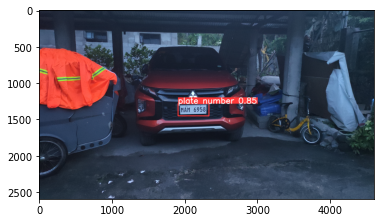

In [20]:
%matplotlib inline
plt.imshow(np.squeeze(results.render()))
plt.show()